<a href="https://colab.research.google.com/github/Sankalpa0011/CNN-Face-Mask-Detection/blob/main/CNN_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

## **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

import google.colab.patches as cv2_imshow
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

## **Data Preprocessing**

In [3]:
# Load datasets

data = np.load("/content/drive/MyDrive/DL Projects/CNN Face Mask Detection/data.npy")
target = np.load("/content/drive/MyDrive/DL Projects/CNN Face Mask Detection/target.npy")

In [4]:
# shapes of the datsets
print(data.shape)
print(target.shape)

(7553, 50, 50, 1)
(7553, 2)


## **Train Test Split**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

## **Convolutional Neural Network Architecture**

In [6]:
num_of_classes = 2
image_size = 50

# build architecture
model = Sequential()

model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_of_classes, activation="softmax"))

# compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dropout (Dropout)           (None, 7744)              0

In [7]:
# train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
170/170 [==============================] - 79s 446ms/step - loss: 0.6926 - accuracy: 0.5303 - val_loss: 0.6630 - val_accuracy: 0.6446
Epoch 2/20
170/170 [==============================] - 65s 383ms/step - loss: 0.6199 - accuracy: 0.6665 - val_loss: 0.5765 - val_accuracy: 0.7124
Epoch 3/20
170/170 [==============================] - 70s 413ms/step - loss: 0.5543 - accuracy: 0.7350 - val_loss: 0.4305 - val_accuracy: 0.8314
Epoch 4/20
170/170 [==============================] - 65s 383ms/step - loss: 0.4677 - accuracy: 0.7944 - val_loss: 0.3787 - val_accuracy: 0.8347
Epoch 5/20
170/170 [==============================] - 70s 415ms/step - loss: 0.4331 - accuracy: 0.8161 - val_loss: 0.3553 - val_accuracy: 0.8479
Epoch 6/20
170/170 [==============================] - 66s 387ms/step - loss: 0.3785 - accuracy: 0.8389 - val_loss: 0.3537 - val_accuracy: 0.8512
Epoch 7/20
170/170 [==============================] - 66s 388ms/step - loss: 0.3489 - accuracy: 0.8543 - val_loss: 0.3819 - val_ac

## **Model Evaluation**

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: " , accuracy)

48/48 [==============================] - 4s 79ms/step - loss: 0.2499 - accuracy: 0.9140
Test accuracy:  0.9139642715454102


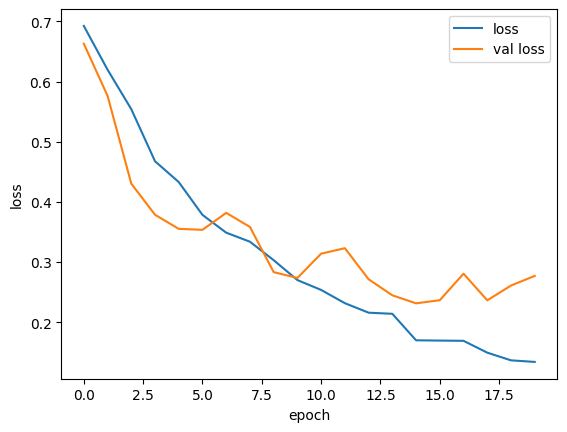

In [9]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

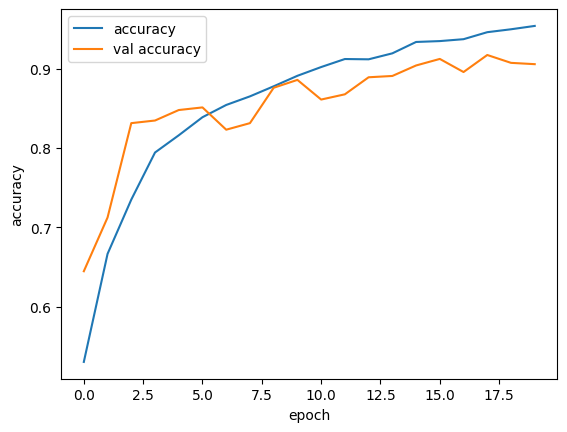

In [10]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## **Save the model**

In [11]:
# save the model
model.save("face_mask_detection_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Predictive System**

In [12]:
from keras.models import load_model

# load the trained model
model = load_model("face_mask_detection_model.h5")

In [13]:
# function to preprocess a new input image
def preprocess_image(img_path, img_size=50):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0  # Normalize the image
    img = np.reshape(img, (1, img_size, img_size, 1))  # reshape to match the input shape
    return img

In [15]:
# load and preprocess the new image
new_image_path = "/content/with mask.jpg"  # replace with your image path
new_image = preprocess_image(new_image_path)

In [16]:
# predict the class of the new image
prediction = model.predict(new_image)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 237ms/step


In [17]:
# map the predicted class to the corresponding label
categories = ['without_mask', 'with_mask']  # replace with actual categories
predicted_label = categories[predicted_class]

# display the result
print(f"The predicted label for the input image is: {predicted_label}")

The predicted label for the input image is: with_mask


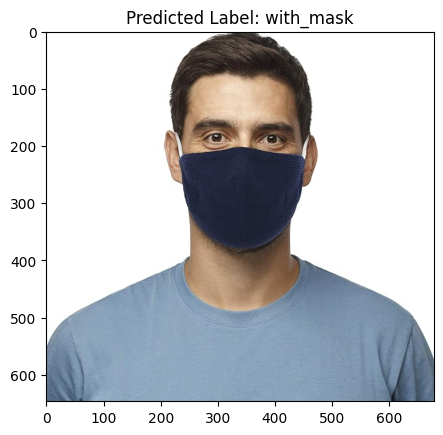

In [18]:
# display the image
plt.imshow(cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Label: {predicted_label}")
plt.show()